In [1]:
# import requests
# from bs4 import BeautifulSoup

# base_url = 'https://www.emlakjet.com/kiralik-konut/istanbul'

# # 50 sayfa linkini hazırlıyoruz
# page_links = [base_url]
# for i in range(2, 51):
#     page_links.append(f'{base_url}?sayfa={i}')

# # İlan linklerini burada toplayacağız
# ilan_linkleri = []

# # Her sayfa için gezelim:
# for page_url in page_links:
#     print(f"Sayfa işleniyor: {page_url}")
#     response = requests.get(page_url)
#     soup = BeautifulSoup(response.content, 'html.parser')

#     # Her ilan linkini bul
#     ilanlar = soup.find_all("a", class_="styles_wrapper__H_QG2")

#     for ilan in ilanlar:
#         href = ilan.get("href")
#         full_link = "https://www.emlakjet.com" + href
#         ilan_linkleri.append(full_link)


# print(f"Toplam {len(ilan_linkleri)} ilan linki bulundu.")
# for link in ilan_linkleri[:10]:
#     print(link)


In [2]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd
# import time

# # İlan linklerini toplayacağımız liste
# ilan_linkleri = []

# # Kaç sayfa? Örneğin 1-50 → sonra artırırsın
# for sayfa in range(1, 21):
#     url = f"https://www.emlakjet.com/kiralik-konut/istanbul?sayfa={sayfa}"
#     print(f"Sayfa işleniyor: {url}")

#     try:
#         response = requests.get(url)
#         soup = BeautifulSoup(response.content, "html.parser")

#         # İlan kartlarını bul
#         for a_tag in soup.find_all("a", class_="styles_wrapper__H_QG2"):
#             href = a_tag.get("href")
#             if href:
#                 ilan_link = "https://www.emlakjet.com" + href
#                 ilan_linkleri.append(ilan_link)

#         # Yavaşlatma (isteğe bağlı)
#         time.sleep(1)

#     except Exception as e:
#         print(f"⚠️ Sayfa hatası: {url} --> {e}")

# # Kaç ilan linki bulundu?
# print(f"\nToplam {len(ilan_linkleri)} ilan linki bulundu.")

# # Şimdi ilan detaylarını çekelim
# dict_list = []

# for i, ilan_url in enumerate(ilan_linkleri):
#     print(f"{i+1}. ilan işleniyor: {ilan_url}")

#     try:
#         response = requests.get(ilan_url)
#         soup = BeautifulSoup(response.content, 'html.parser')

#         ilan_data = {}

#         # Fiyat
#         fiyat_span = soup.find("span", class_="styles_price__6zH_9")
#         ilan_data["Fiyat"] = fiyat_span.get_text(strip=True) if fiyat_span else None

#         # Konum
#         konum_span = soup.find("span", class_="styles_location__Y01SC")
#         ilan_data["Konum"] = konum_span.get_text(strip=True) if konum_span else None

#         # İlan Bilgileri
#         ilan_bilgileri_div = soup.find("div", id="ilan-hakkinda")

#         if ilan_bilgileri_div:
#             for li in ilan_bilgileri_div.find_all("li"):
#                 key_span = li.find("span", class_="styles_key__VqMhC")
#                 value_span = li.find("span", class_="styles_value__3QmL3")

#                 if key_span and value_span:
#                     key = key_span.get_text(strip=True)
#                     value = value_span.get_text(strip=True)
#                     ilan_data[key] = value
#         else:
#             print(f"❗️ İlan Bilgileri div bulunamadı: {ilan_url}")

#         # Dict ekle
#         dict_list.append(ilan_data)

#         # Yavaşlatma (çok hızlı olmasın — ban yememek için)
#         time.sleep(1)

#     except Exception as e:
#         print(f"⚠️ İlan hatası: {ilan_url} --> {e}")

# # Sonuç
# print(f"\nToplam {len(dict_list)} ilan işlendi.")

# # DataFrame
# df = pd.DataFrame(dict_list)
# print(df.head())




In [3]:
# df.head()

In [4]:
# # DataFrame'deki kolon isimlerini görelim
# print(df.columns.tolist())


In [5]:
# df.to_csv("ilan_bilgileri_test.csv", index=False)


In [6]:
import pandas as pd
# CSV'den tekrar df oku
df = pd.read_csv("ilan_bilgileri_test.csv")

# Kontrol edelim
print(df.head())


      Fiyat                                              Konum  İlan Numarası  \
0  20.000TL             İstanbul - Pendik - Esenyalı Mahallesi       17533328   
1  22.000TL  İstanbul - Esenyurt - Mehmet Akif Ersoy Mahallesi       17518842   
2  28.000TL             İstanbul - Pendik - Esenyalı Mahallesi       17513222   
3  17.000TL         İstanbul - Silivri - Mimar Sinan Mahallesi       17507265   
4  26.000TL          İstanbul - Bahçelievler - Zafer Mahallesi       17481030   

  İlan Oluşturma Tarihi İlan Güncelleme Tarihi   Türü Kategorisi   Tipi  \
0       23 Haziran 2025        23 Haziran 2025  Konut    Kiralık  Daire   
1       20 Haziran 2025        20 Haziran 2025  Konut    Kiralık  Daire   
2       19 Haziran 2025        19 Haziran 2025  Konut    Kiralık  Daire   
3       18 Haziran 2025        21 Haziran 2025  Konut    Kiralık  Daire   
4       13 Haziran 2025        23 Haziran 2025  Konut    Kiralık  Daire   

  Net Metrekare Brüt Metrekare  ... Takas Balkon Durumu Balkon

In [7]:
# Fiyat temizleme fonksiyonu
def temizle_fiyat(fiyat_str):
    if pd.isna(fiyat_str):
        return None
    # '13.600.000 TL' veya '13.600.000TL' --> '13600000'
    temiz = fiyat_str.replace(".", "").replace(" TL", "").replace("TL", "").replace("₺", "").strip()
    try:
        return float(temiz)
    except:
        return None

# Fiyat kolonunu uygula
df["Fiyat"] = df["Fiyat"].apply(temizle_fiyat)

# Sonuç kontrol
print(df["Fiyat"].head())


0    20000.0
1    22000.0
2    28000.0
3    17000.0
4    26000.0
Name: Fiyat, dtype: float64


In [8]:
# m² temizleme fonksiyonu
def temizle_metrekare(m2_str):
    if pd.isna(m2_str):
        return None
    temiz = m2_str.replace("m²", "").replace("m2", "").replace(" ", "").strip()
    try:
        return float(temiz)
    except:
        return None

# Uygulama
df["Net Metrekare"] = df["Net Metrekare"].apply(temizle_metrekare)
df["Brüt Metrekare"] = df["Brüt Metrekare"].apply(temizle_metrekare)

# Sonuç kontrol
print(df[["Net Metrekare", "Brüt Metrekare"]].head())



   Net Metrekare  Brüt Metrekare
0          100.0           110.0
1           90.0           100.0
2          110.0           130.0
3           72.0            92.0
4           75.0            80.0


In [9]:
# Oda Sayısı temizleme fonksiyonu
def temizle_oda_sayisi(oda_str):
    if pd.isna(oda_str):
        return None
    try:
        parcalar = oda_str.split("+")
        toplam = sum([int(sayi) for sayi in parcalar])
        return toplam
    except:
        return None

# Uygulama
df["Toplam_Oda"] = df["Oda Sayısı"].apply(temizle_oda_sayisi)

# Sonuç kontrol
print(df[["Oda Sayısı", "Toplam_Oda"]].head())


  Oda Sayısı  Toplam_Oda
0        2+1         3.0
1        2+1         3.0
2        3+1         4.0
3        2+1         3.0
4        2+1         3.0


In [10]:
# Oda Sayısı kolonunu silelim
df.drop(columns=["Oda Sayısı"], inplace=True)

# Kontrol
print(df.columns.tolist())


['Fiyat', 'Konum', 'İlan Numarası', 'İlan Oluşturma Tarihi', 'İlan Güncelleme Tarihi', 'Türü', 'Kategorisi', 'Tipi', 'Net Metrekare', 'Brüt Metrekare', 'Binanın Yaşı', 'Bulunduğu Kat', 'Binanın Kat Sayısı', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Ada', 'Parsel', 'Depozito', 'Yapı Durumu', 'Yapı Tipi', 'Eşya Durumu', 'Aidat', 'Takas', 'Balkon Durumu', 'Balkon Sayısı', 'Balkon Tipi', 'WC Sayısı', 'Görüntülü Gezilebilir mi?', 'Banyo Metrekare', 'Balkon Metrekare', 'Salon Metrekare', 'WC Metrekare', 'Toplam_Oda']


In [11]:
# Binanın Yaşı temizleme fonksiyonu
def temizle_bina_yasi(yas_str):
    if pd.isna(yas_str):
        return None
    yas_str = yas_str.lower()
    if "yeni" in yas_str:
        return 0
    elif "ve üzeri" in yas_str:
        return 25
    elif "-" in yas_str:
        try:
            alt, ust = yas_str.split("-")
            return (int(alt) + int(ust)) // 2
        except:
            return None
    else:
        try:
            return int(yas_str)
        except:
            return None

# Uygulama
df["Binanın Yaşı"] = df["Binanın Yaşı"].apply(temizle_bina_yasi)

# Sonuç kontrol
print(df["Binanın Yaşı"].head())


0    25
1    13
2    25
3     4
4     7
Name: Binanın Yaşı, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# GÜNCELLEME: kategorik kolonları tekrar çıkarıyoruz:
kategorik_kolonlar = df.select_dtypes(include=["object"]).columns.tolist()

# Fiyat, Konum, İlan No, Tarih kolonlarını kategorikten çıkar:
ignore_list = ["Fiyat", "Konum", "İlan Numarası", "İlan Oluşturma Tarihi", "İlan Güncelleme Tarihi", "Türü", "Kategorisi"]

kategorik_kolonlar = [col for col in kategorik_kolonlar if col not in ignore_list]

# Label Encoding
for kolon in kategorik_kolonlar:
    df[kolon] = df[kolon].fillna("Bilinmiyor")
    df[kolon] = le.fit_transform(df[kolon])

# Kontrol
print(kategorik_kolonlar)


['Tipi', 'Bulunduğu Kat', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Depozito', 'Yapı Durumu', 'Yapı Tipi', 'Eşya Durumu', 'Aidat', 'Takas', 'Balkon Durumu', 'Balkon Sayısı', 'Balkon Tipi', 'WC Sayısı', 'Görüntülü Gezilebilir mi?', 'Banyo Metrekare', 'Balkon Metrekare', 'Salon Metrekare', 'WC Metrekare']


In [13]:
def temizle_kat(kat_str):
    if pd.isna(kat_str):
        return None
    kat_str = str(kat_str).lower()  # ÖNEMLİ: önce str() yapıyoruz!
    if "zemin" in kat_str:
        return 0
    elif "bahçe" in kat_str:
        return -1
    elif "yüksek giriş" in kat_str:
        return 0
    elif "müstakil" in kat_str:
        return None
    elif "çatı" in kat_str:
        return None
    else:
        try:
            return int(kat_str.split(".")[0])
        except:
            return None

# Uygula
df["Bulunduğu Kat"] = df["Bulunduğu Kat"].apply(temizle_kat)

# Kontrol
print(df["Bulunduğu Kat"].head())


0    9
1    0
2    0
3    9
4    9
Name: Bulunduğu Kat, dtype: int64


In [14]:
# Eksik veri sayısı ve oranı
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)).sort_values(ascending=False) * 100

# Birleştirip gösterelim
eksik_df = pd.DataFrame({"Eksik_Sayi": missing, "Eksik_Yuzde": missing_percent})
print(eksik_df)


                           Eksik_Sayi  Eksik_Yuzde
Ada                               373    62.270451
Parsel                            339    56.594324
Toplam_Oda                         24     4.006678
Salon Metrekare                     0     0.000000
Balkon Metrekare                    0     0.000000
Banyo Metrekare                     0     0.000000
Görüntülü Gezilebilir mi?           0     0.000000
WC Sayısı                           0     0.000000
Balkon Tipi                         0     0.000000
WC Metrekare                        0     0.000000
Balkon Durumu                       0     0.000000
Takas                               0     0.000000
Aidat                               0     0.000000
Eşya Durumu                         0     0.000000
Yapı Tipi                           0     0.000000
Yapı Durumu                         0     0.000000
Depozito                            0     0.000000
Balkon Sayısı                       0     0.000000
Fiyat                          

In [15]:
drop_kolonlar = [
    "Balkon Metrekare",
    "WC Metrekare",
    "Salon Metrekare",
    "Banyo Metrekare",
    "Balkon Tipi",
    "Görüntülü Gezilebilir mi?",
    "Balkon Sayısı",
    "Takas",
    "WC Sayısı"
]

# Silme işlemi
df.drop(columns=drop_kolonlar, inplace=True)

# Kontrol
print(df.columns.tolist())


['Fiyat', 'Konum', 'İlan Numarası', 'İlan Oluşturma Tarihi', 'İlan Güncelleme Tarihi', 'Türü', 'Kategorisi', 'Tipi', 'Net Metrekare', 'Brüt Metrekare', 'Binanın Yaşı', 'Bulunduğu Kat', 'Binanın Kat Sayısı', 'Isıtma Tipi', 'Kullanım Durumu', 'Tapu Durumu', 'Site İçerisinde', 'Banyo Sayısı', 'Fiyat Durumu', 'Ada', 'Parsel', 'Depozito', 'Yapı Durumu', 'Yapı Tipi', 'Eşya Durumu', 'Aidat', 'Balkon Durumu', 'Toplam_Oda']


In [16]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

def algo_test(x,y):
    # Modeller
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    sgd=SGDRegressor()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    rkn=RadiusNeighborsRegressor(radius=1.0)
    ada=AdaBoostRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    svr=SVR()
    mlp_regressor = MLPRegressor()

    algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
    
    r_squared= []
    rmse= []
    mae= []

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    rtable=result.sort_values('R_Squared',ascending=False)
    return rtable


In [17]:
# import warnings
# warnings.filterwarnings("ignore")
# # X ve Y hazırlanıyor
# y = df["Fiyat"]
# x = df.drop(columns=[
#     "Fiyat", "Konum", "İlan Numarası", "İlan Oluşturma Tarihi", "İlan Güncelleme Tarihi", "Türü", "Kategorisi"
# ])

# # Eksik verileri atıyoruz
# x = x.dropna()
# y = y.loc[x.index]

# # Algo test çalıştırıyoruz
# results = algo_test(x, y)
# # Sonucu daha okunaklı gösterelim
# pd.options.display.float_format = '{:.4f}'.format
# print(results)


()

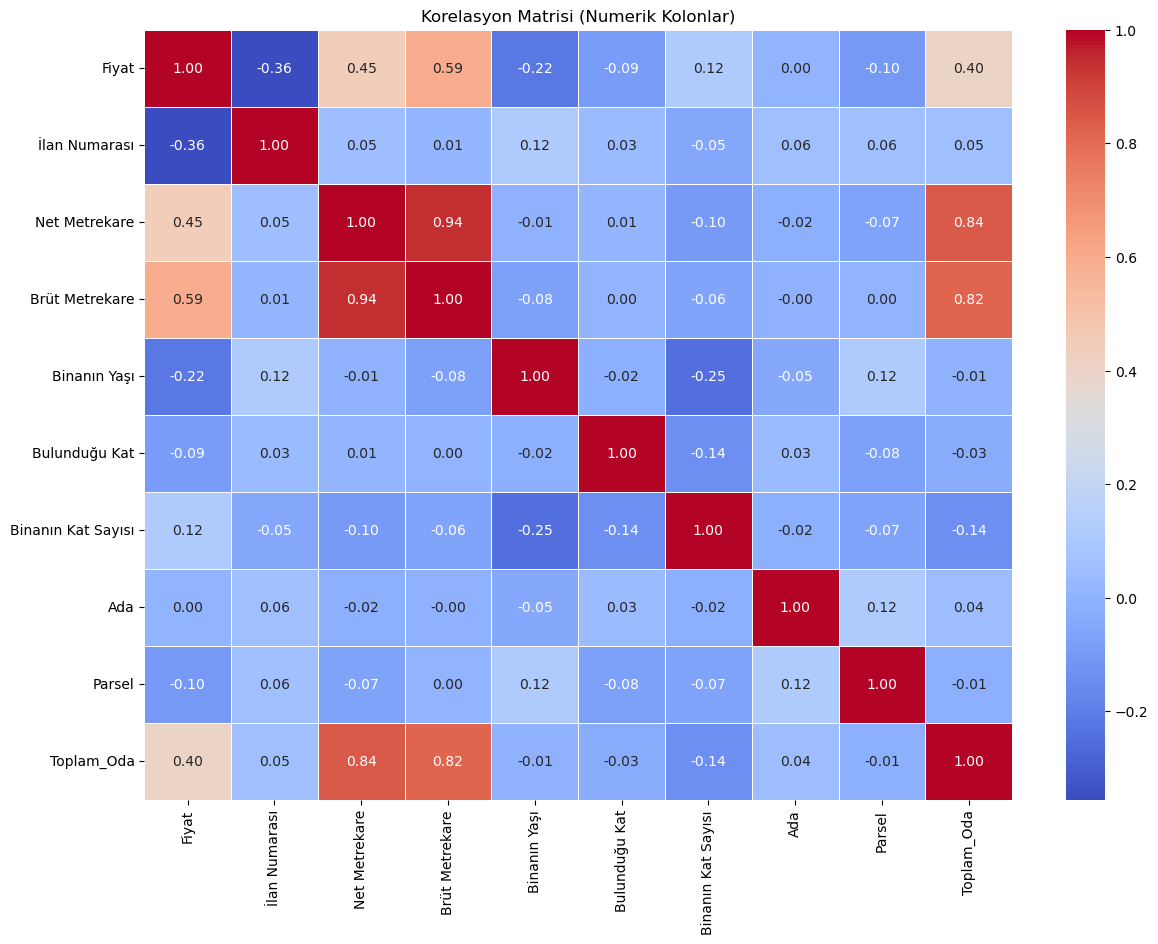

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sadece numerik kolonları al
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisi
corr = numeric_df.corr()

# Heatmap çizdir
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi (Numerik Kolonlar)")
plt.show()


               Feature  Importance
6          Isıtma Tipi    0.225117
0                 Tipi    0.214636
8          Tapu Durumu    0.127733
1        Net Metrekare    0.101667
10        Banyo Sayısı    0.082384
2       Brüt Metrekare    0.046643
14            Depozito    0.037378
9      Site İçerisinde    0.027506
20          Toplam_Oda    0.026930
12                 Ada    0.019488
4        Bulunduğu Kat    0.015393
17         Eşya Durumu    0.015066
13              Parsel    0.011767
5   Binanın Kat Sayısı    0.010611
3         Binanın Yaşı    0.010162
18               Aidat    0.006614
7      Kullanım Durumu    0.005703
15         Yapı Durumu    0.005290
19       Balkon Durumu    0.005123
16           Yapı Tipi    0.003443


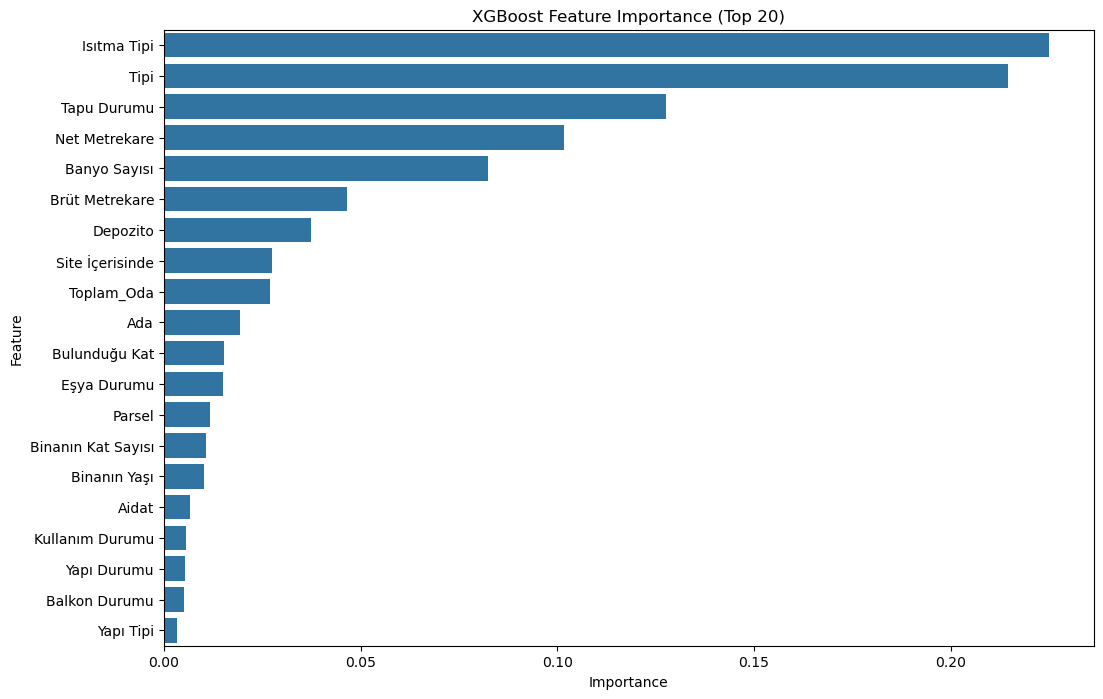

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# X ve Y hazırla
y = df["Fiyat"]
x = df.drop(columns=[
    "Fiyat", "Konum", "İlan Numarası", "İlan Oluşturma Tarihi", 
    "İlan Güncelleme Tarihi", "Türü", "Kategorisi"
])

# Kategorik kolonları one-hot encode yap
x = pd.get_dummies(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model
xgb_model = XGBRegressor()
xgb_model.fit(x_train, y_train)

# Feature importance dataframe
importance_df = pd.DataFrame({
    "Feature": x.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Göster
print(importance_df.head(20))  # En önemli 20 kolon

# Barplot
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20))
plt.title("XGBoost Feature Importance (Top 20)")
plt.show()


In [22]:
# Korelasyon hesapla
corr_df = df.corr(numeric_only=True)

# Fiyat ile en yüksek korelasyon kolonları
corr_target = corr_df["Fiyat"].drop("Fiyat").sort_values(ascending=False)
print("Fiyat ile en yüksek korelasyona sahip kolonlar:")
print(corr_target)

# Seçilecek kolonlar: mesela en yüksek 5 kolon
top_corr_cols = corr_target.head(5).index.tolist()
print("\nSeçilen kolonlar:", top_corr_cols)

# X ve y hazırla
y = df["Fiyat"]
x = df[top_corr_cols]

# Kategorik varsa dummy'ye çevir (bu sefer gerek yok çünkü numeric kolonlar seçiyoruz)
# x = pd.get_dummies(x)

# Eksik doldur
x = x.fillna(0)

# Algo test çalıştır
results = algo_test(x, y)
print(results)


Fiyat ile en yüksek korelasyona sahip kolonlar:
Brüt Metrekare        0.5941
Banyo Sayısı          0.4656
Net Metrekare         0.4477
Tipi                  0.4383
Toplam_Oda            0.4036
Isıtma Tipi           0.3088
Depozito              0.2171
Binanın Kat Sayısı    0.1184
Aidat                 0.1087
Kullanım Durumu       0.0983
Eşya Durumu           0.0909
Yapı Tipi             0.0863
Tapu Durumu           0.0742
Fiyat Durumu          0.0384
Ada                   0.0026
Bulunduğu Kat        -0.0919
Parsel               -0.1029
Yapı Durumu          -0.1056
Balkon Durumu        -0.1397
Binanın Yaşı         -0.2177
Site İçerisinde      -0.2520
İlan Numarası        -0.3559
Name: Fiyat, dtype: float64

Seçilen kolonlar: ['Brüt Metrekare', 'Banyo Sayısı', 'Net Metrekare', 'Tipi', 'Toplam_Oda']
                                  R_Squared               RMSE  \
Linear                               0.5202         14521.8796   
Lasso                                0.5201         14522.052

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
